半监督学习

LabelSpreading

手写数字识别

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-digits-py

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report

In [5]:
digits = datasets.load_digits()

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.data.shape # 这个flatten了，图片展开为一维数组

(1797, 64)

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.images[1] # 8*8的

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

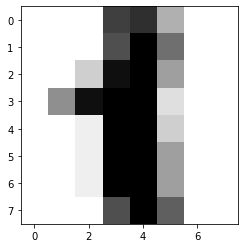

In [12]:
img = digits.images[1]
plt.imshow(img, cmap=plt.cm.gray_r);

In [13]:
# 随机数设置随机数种子
rng = np.random.RandomState(2)

In [14]:
# 索引
indices = np.arange(len(digits.data))
indices

array([   0,    1,    2, ..., 1794, 1795, 1796])

In [15]:
# 打乱索引的顺序
rng.shuffle(indices)

In [16]:
indices

array([ 154,  564, 1444, ...,  493,  527, 1192])

In [17]:
# 取出340个
X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

In [18]:
# 样本总数
n_total_samples = len(y)
n_total_samples

340

In [19]:
# 有标签数据
n_labeled_points = 40

In [20]:
# 取出的数据索引
indices = np.arange(n_total_samples)
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [21]:
# 无标签数据索引
unlabeled_set = indices[n_labeled_points:]
unlabeled_set

array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [22]:
# 复制全部样本
y_train = np.copy(y)
# 将无标签数据标记为-1
y_train[unlabeled_set] = -1
y_train

array([ 4,  0,  9,  1,  4,  7,  1,  5,  1,  6,  6,  7,  6,  1,  5,  5,  4,
        6,  2,  7,  4,  6,  4,  1,  5,  2,  9,  5,  4,  6,  5,  6,  3,  4,
        0,  9,  9,  8,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [23]:
# 使用LabelSpreading方法学习
lp_model = LabelSpreading(gamma=.25, max_iter=20) 

参数

In [24]:
lp_model.fit(X, y_train)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [25]:
# 预测的标签
predicted_labels = lp_model.transduction_[unlabeled_set]

看一眼各种方法

In [26]:
# 真实标签
true_labels = y[unlabeled_set]

In [27]:
# 混淆矩阵
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 24,  0,  0,  0,  2,  1,  0,  0],
       [ 0,  0,  0, 28,  0,  5,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  3,  0, 31,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  1,  0, 21,  2],
       [ 0,  0,  0,  0,  1,  2,  0,  0,  0, 21]], dtype=int64)

In [28]:
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

Label Spreading model: 40 labeled & 300 unlabeled points (340 total)


In [29]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [30]:
print("Confusion matrix")
print(cm)

Confusion matrix
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 24  0  0  0  2  1  0  0]
 [ 0  0  0 28  0  5  0  1  0  1]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  2]
 [ 0  0  0  0  0  1 24  0  0  0]
 [ 0  0  0  0  1  3  0 31  0  0]
 [ 0  7  0  0  0  0  1  0 21  2]
 [ 0  0  0  0  1  2  0  0  0 21]]


In [31]:
# 对于每个判断，不确定性值
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)
# pred_entropies

In [33]:
# 选出最不确定的十个
uncertainty_index = np.argsort(pred_entropies)[-10:]
uncertainty_index

array([213, 120, 238, 156,  73,  84,  55, 306,  89, 301], dtype=int64)

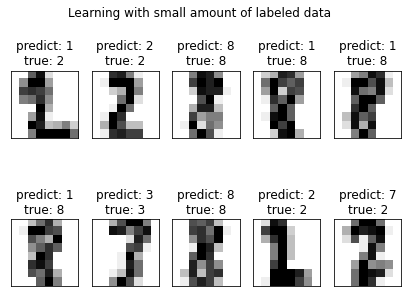

In [34]:
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()

## 如何表征不确定性，这里使用信息熵


In [41]:
lp_model.label_distributions_[0]

array([2.64299952e-123, 2.22929697e-090, 1.89507047e-185, 7.43486818e-192,
       1.00000000e+000, 8.44802268e-123, 1.85791059e-151, 5.98217833e-142,
       1.19064717e-145, 9.85757625e-157])


[stats.distributions.entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html)

scipy.stats.entropy(pk, qk=None, base=None, axis=0)[source]

Calculate the entropy of a distribution for given probability values.

- If only probabilities pk are given, the entropy is calculated as S = -sum(pk * log(pk), axis=axis).

- If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=axis).

- This routine will normalize pk and qk if they don’t sum to 1.

Parameters

- pksequence Defines the (discrete) distribution. pk[i] is the (possibly unnormalized) probability of event i.

- qksequence, optional Sequence against which the relative entropy is computed. Should be in the same format as pk.

- base float, optional The logarithmic base to use, defaults to e (natural logarithm).

- axis: int, optional The axis along which the entropy is calculated. Default is 0.

Returns

- S float The calculated entropy.

In [45]:
from scipy.stats import entropy

# Bernoulli trial with different p. The outcome of a fair coin is the most uncertain:
entropy([1/2, 1/2], base=2)

1.0

In [46]:
# The outcome of a biased coin is less uncertain:
entropy([9/10, 1/10], base=2)

0.46899559358928117

In [47]:
# Relative entropy:
entropy([1/2, 1/2], qk=[9/10, 1/10])

0.5108256237659907

In [51]:
entropy([1/4, 1/4, 1/4, 1/4], base=2)

2.0